In [10]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
pd.options.display.max_rows = None
pd.options.display.max_columns = None
df = pd.read_csv('cleaned_data.csv')
df
# df[df['Fraud']==1].shape[0]

,Income,Post-code,Employed,Home Owner,Education,Gender,Balance,Age,Colour,Fraud
0,10500,16,0,0,1,0,300.0,25.0,5,0
1,26525,39,1,0,0,1,3500.0,25.0,1,0
2,8230,0,0,0,1,0,1250.0,25.0,4,1
3,25000,68,0,0,2,0,6755.0,19.0,5,1
4,15250,40,0,0,1,1,810.0,23.0,4,1
5,42000,43,1,1,2,0,12000.0,54.0,5,0
6,125500,62,1,1,0,1,76540.0,25.0,4,0
7,12500,27,0,0,1,0,4500.0,24.0,4,1
8,76300,22,0,0,2,0,55030.0,65.0,3,0
9,12340,65,0,0,1,1,550.0,28.0,4,1


In [2]:
X_features = df.drop('Fraud', axis=1, inplace=False)
y_targets = df['Fraud']
X_train, X_test, y_train, y_test=train_test_split(X_features, y_targets, \
                                                  test_size=0.2, random_state=11)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(96, 9) (24, 9) (96,) (24,)


In [3]:
decision_tree = DecisionTreeClassifier(random_state=11)
random_forest = RandomForestClassifier(random_state=11)
logistic_regression = LogisticRegression(solver='liblinear')

decision_tree.fit(X_train,y_train)
decision_tree_predict = decision_tree.predict(X_test)
decision_tree_accuracy_score = accuracy_score(y_test, decision_tree_predict)
print('Decission Tree Accuracy: {0:.4f}'.format(decision_tree_accuracy_score))
print(classification_report(y_test, decision_tree_predict))


random_forest.fit(X_train,y_train)
random_forest_predict = random_forest.predict(X_test)
random_forest_accuracy_score = accuracy_score(y_test, random_forest_predict)
print('Random Forest Accuracy: {0:.4f}'.format(random_forest_accuracy_score))

logistic_regression.fit(X_train,y_train)
logistic_regression_predict = logistic_regression.predict(X_test)
logistic_regression_accuracy_score = accuracy_score(y_test, decision_tree_predict)
print('Logistic Regression Accuracy: {0:.4f}'.format(logistic_regression_accuracy_score))

Decission Tree Accuracy: 0.8750
              precision    recall  f1-score   support

           0       0.79      1.00      0.88        11
           1       1.00      0.77      0.87        13

    accuracy                           0.88        24
   macro avg       0.89      0.88      0.87        24
weighted avg       0.90      0.88      0.87        24

Random Forest Accuracy: 0.9583
Logistic Regression Accuracy: 0.8750


In [4]:
def cross_validation(algorithm_model, folds=5, modelname=""):
    kfold = KFold(n_splits=folds)
    scores = []
    
    # excute cross validation 
    for i , (train_index, test_index) in enumerate(kfold.split(X_features)):
        # create data for training and testing by kfold splited index
        X_train, X_test = X_features.values[train_index], X_features.values[test_index]
        y_train, y_test = y_targets.values[train_index], y_targets.values[test_index]
        
        # Classifier fit, predict, accuracy  
        algorithm_model.fit(X_train, y_train) 
        predictions = algorithm_model.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
        scores.append(accuracy)
        print("{0}'s Closs Validation {1} Accuracy: {2:.4f}".format(modelname, i, accuracy))     
    # avarage of accuracy 
    mean_score = np.mean(scores)
    min_score = np.min(scores)
    print("Avarage Accuracy: {0:.4f}".format(mean_score)) 
    print("Min Accuracy: {0:.4f}".format(min_score)) 
    print("\n")

# invoke cross valication
# cross_validation(decision_tree , folds=10, modelname="Decision Tree") 
# cross_validation(random_forest , folds=10, modelname="Random Forest") 
# cross_validation(logistic_regression , folds=10, modelname="Logistic Regression") 

score = cross_val_score(estimator=decision_tree, X=X_features, y=y_targets, scoring="accuracy", cv=10)
print(score)

# cross-validation 
# hyperparameters 
# scaling" and "de-noising
# improve system accuracy performance
# ROC curves and confusion matrices
# find correlated dimensions
# measure and analyse features and target dependencies 
# •	Analyse the data distribution
# •	For supervised learning analyse how the target variable is influenced by the features
# •	Analyse the difficulty of your prediction task


[0.83333333 0.91666667 0.91666667 0.91666667 0.83333333 1.
 0.91666667 1.         1.         0.91666667]


<AxesSubplot:xlabel='Post-code', ylabel='Education'>

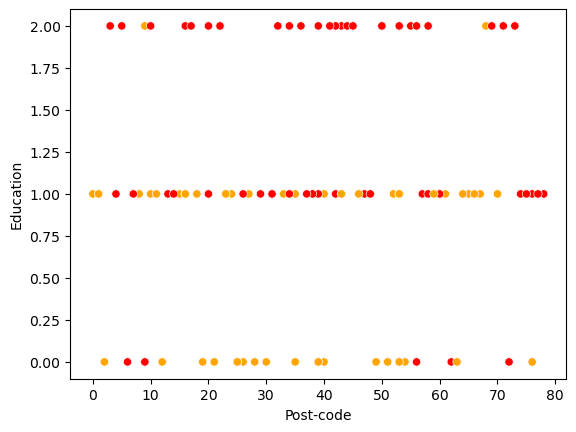

In [5]:
sns.scatterplot(x="Post-code", y="Education", hue='Fraud', markers=["c", "a"], palette=['red', 'orange'], data=df, legend=False)